In [1]:
!pip install pandas matplotlib seaborn datasets numpy wordcloud


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_from_disk
import numpy as np
from collections import Counter
import re
from wordcloud import WordCloud

o:\REDACTION_SYSTEM\prototyping\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
print("\nLoading dataset...")
dataset = load_from_disk("./pii_dataset")

# Convert to pandas for easier analysis
train_df = pd.DataFrame(dataset['train'])
val_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])


Loading dataset...



[1/8] Creating class distribution plots...


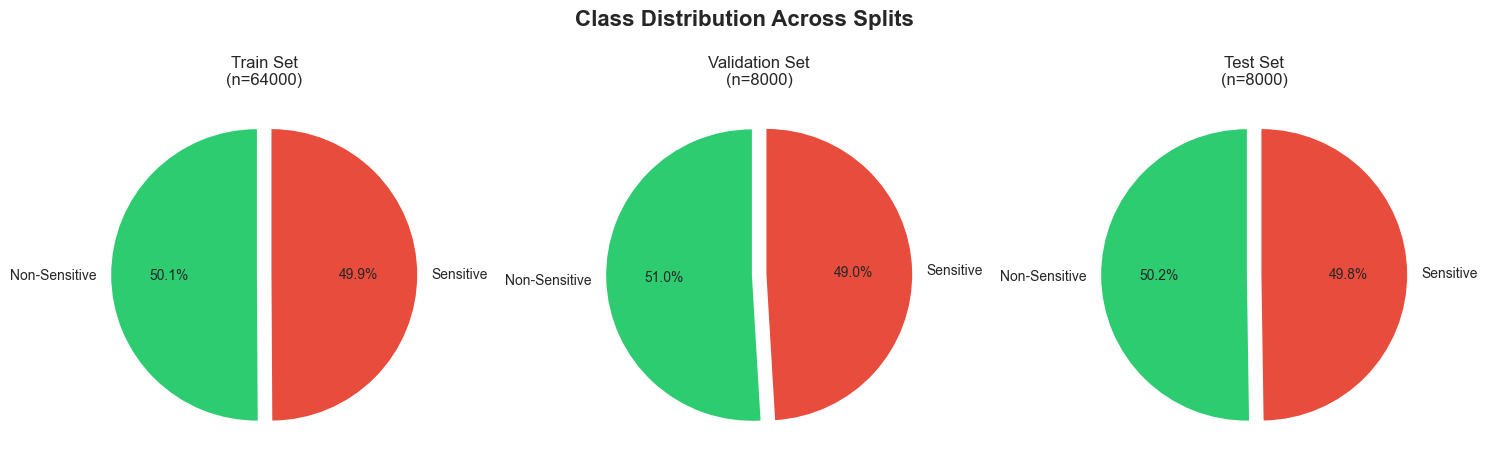

In [5]:
print("\n[1/8] Creating class distribution plots...")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Class Distribution Across Splits', fontsize=16, fontweight='bold')

# Train
train_counts = train_df['label'].value_counts()
axes[0].pie(train_counts, labels=['Non-Sensitive', 'Sensitive'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90, explode=(0.05, 0.05))
axes[0].set_title(f'Train Set\n(n={len(train_df)})')

# Validation
val_counts = val_df['label'].value_counts()
axes[1].pie(val_counts, labels=['Non-Sensitive', 'Sensitive'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90, explode=(0.05, 0.05))
axes[1].set_title(f'Validation Set\n(n={len(val_df)})')

# Test
test_counts = test_df['label'].value_counts()
axes[2].pie(test_counts, labels=['Non-Sensitive', 'Sensitive'], autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90, explode=(0.05, 0.05))
axes[2].set_title(f'Test Set\n(n={len(test_df)})')

plt.tight_layout()


[2/8] Creating category breakdown...


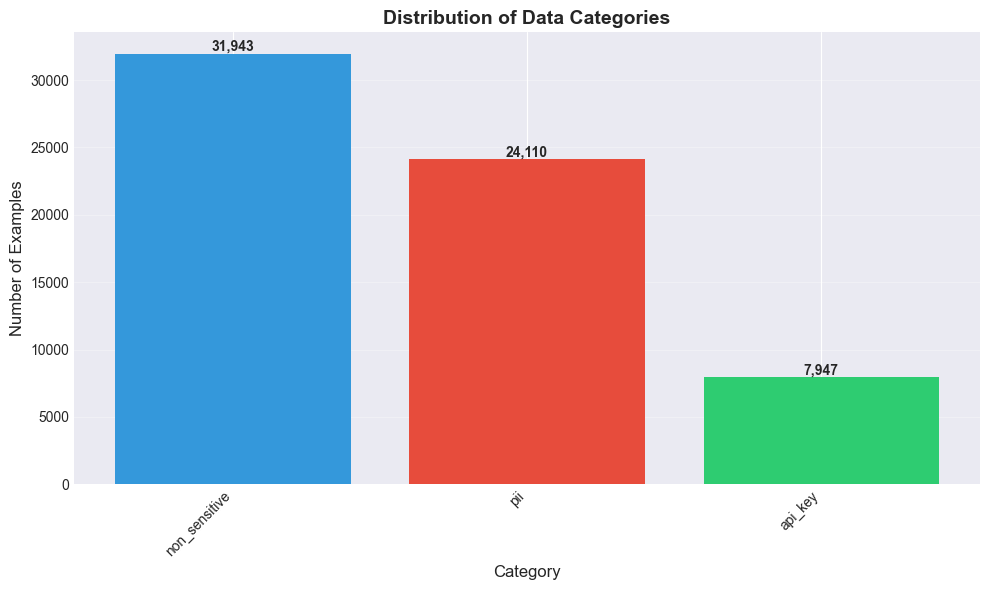

In [6]:
print("\n[2/8] Creating category breakdown...")

fig, ax = plt.subplots(figsize=(10, 6))
category_counts = train_df['category'].value_counts()

bars = ax.bar(range(len(category_counts)), category_counts.values, 
              color=['#3498db', '#e74c3c', '#2ecc71'])
ax.set_xticks(range(len(category_counts)))
ax.set_xticklabels(category_counts.index, rotation=45, ha='right')
ax.set_ylabel('Number of Examples', fontsize=12)
ax.set_xlabel('Category', fontsize=12)
ax.set_title('Distribution of Data Categories', fontsize=14, fontweight='bold')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()


[3/8] Analyzing text length distribution...


C:\Users\gnana\AppData\Local\Temp\ipykernel_36100\2964903787.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[1, 0].boxplot(data_to_plot, labels=['Non-Sensitive', 'Sensitive'],
C:\Users\gnana\AppData\Local\Temp\ipykernel_36100\2964903787.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1, 1].boxplot(data_to_plot, labels=['Non-Sensitive', 'Sensitive'],


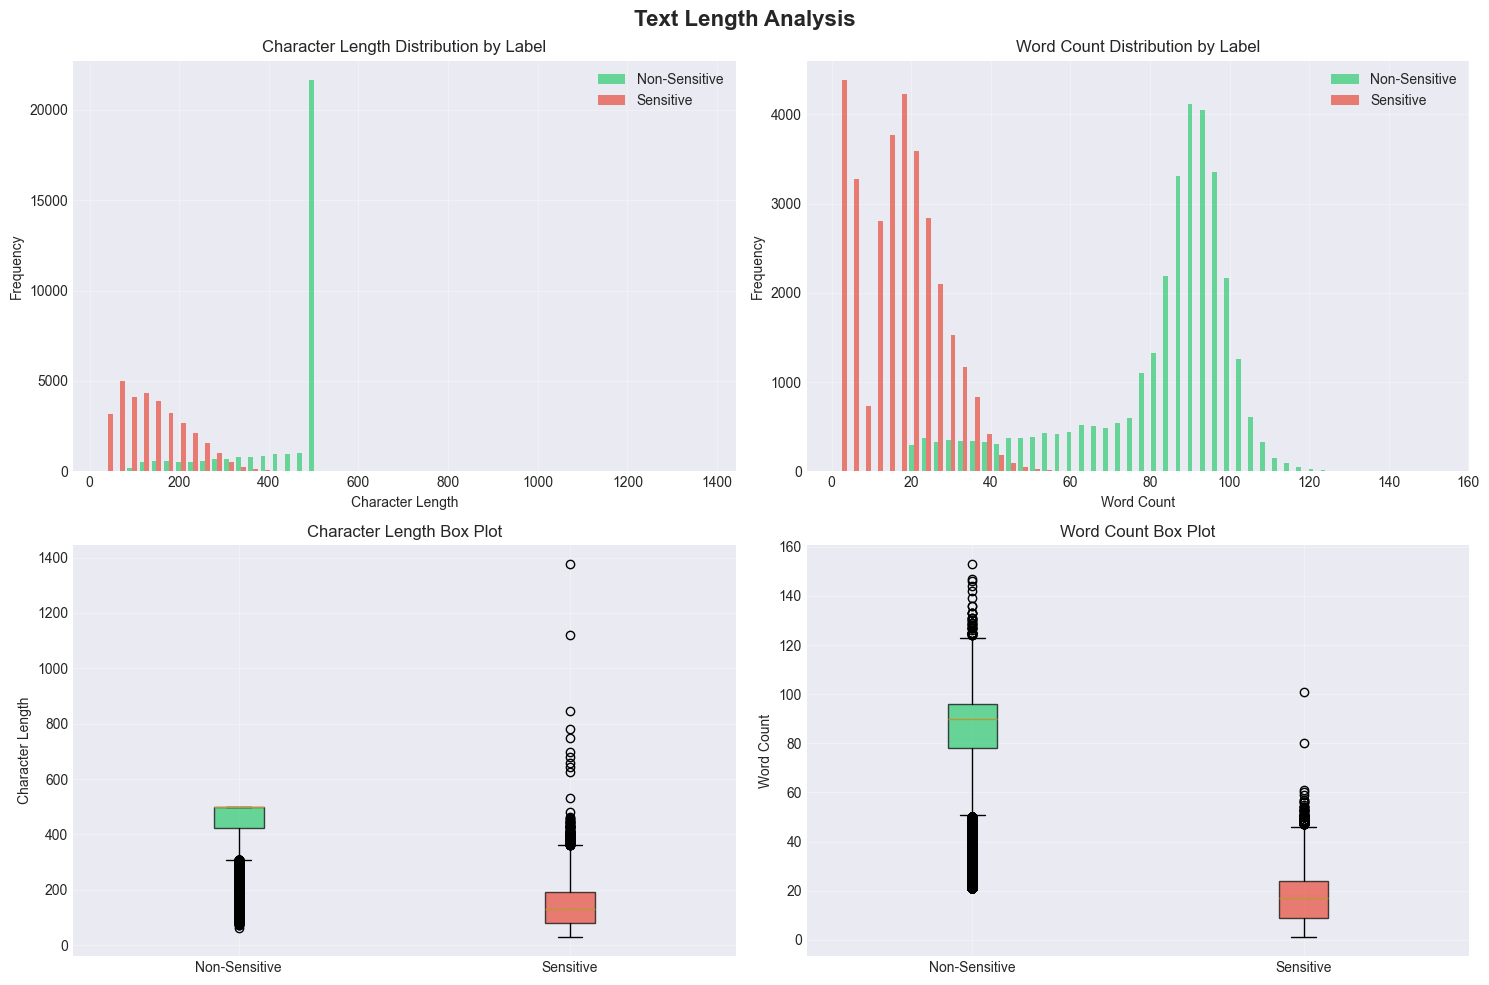

In [7]:
print("\n[3/8] Analyzing text length distribution...")

train_df['text_length'] = train_df['text'].apply(len)
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Text Length Analysis', fontsize=16, fontweight='bold')

# Character length by label
axes[0, 0].hist([train_df[train_df['label']==0]['text_length'],
                 train_df[train_df['label']==1]['text_length']],
                bins=50, label=['Non-Sensitive', 'Sensitive'], 
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 0].set_xlabel('Character Length')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Character Length Distribution by Label')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Word count by label
axes[0, 1].hist([train_df[train_df['label']==0]['word_count'],
                 train_df[train_df['label']==1]['word_count']],
                bins=50, label=['Non-Sensitive', 'Sensitive'], 
                color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Word Count Distribution by Label')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot - Character length
data_to_plot = [train_df[train_df['label']==0]['text_length'],
                train_df[train_df['label']==1]['text_length']]
bp1 = axes[1, 0].boxplot(data_to_plot, labels=['Non-Sensitive', 'Sensitive'],
                          patch_artist=True)
for patch, color in zip(bp1['boxes'], ['#2ecc71', '#e74c3c']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_ylabel('Character Length')
axes[1, 0].set_title('Character Length Box Plot')
axes[1, 0].grid(alpha=0.3)

# Box plot - Word count
data_to_plot = [train_df[train_df['label']==0]['word_count'],
                train_df[train_df['label']==1]['word_count']]
bp2 = axes[1, 1].boxplot(data_to_plot, labels=['Non-Sensitive', 'Sensitive'],
                          patch_artist=True)
for patch, color in zip(bp2['boxes'], ['#2ecc71', '#e74c3c']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].set_title('Word Count Box Plot')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()



[4/8] Creating statistics summary...

Statistics by Label:
      text_length                          word_count                       
             mean median     std min   max       mean median    std min  max
label                                                                       
0          441.24  500.0  105.81  63   500      82.66   90.0  20.68  21  153
1          143.28  132.0   75.19  28  1377      17.21   17.0   9.99   1  101

Statistics by Category:
              text_length                word_count              
                     mean median     std       mean median    std
category                                                         
api_key             60.74   58.0   15.58       4.40    4.0   2.17
non_sensitive      441.24  500.0  105.81      82.66   90.0  20.68
pii                170.48  159.0   66.71      21.43   20.0   7.69


Text(0.5, 1.0, 'Dataset Statistics Summary')

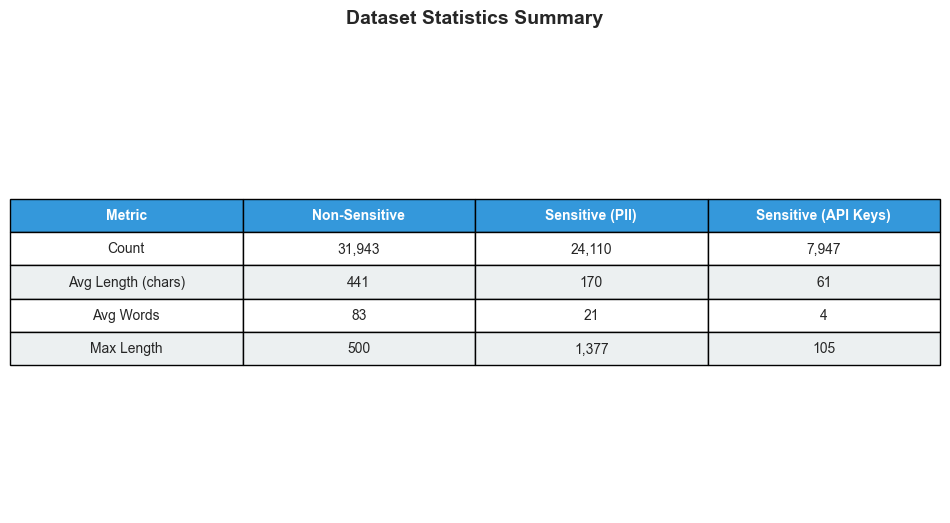

In [8]:
print("\n[4/8] Creating statistics summary...")

stats_by_label = train_df.groupby('label').agg({
    'text_length': ['mean', 'median', 'std', 'min', 'max'],
    'word_count': ['mean', 'median', 'std', 'min', 'max']
}).round(2)

stats_by_category = train_df.groupby('category').agg({
    'text_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std']
}).round(2)

print("\nStatistics by Label:")
print(stats_by_label)

print("\nStatistics by Category:")
print(stats_by_category)

# Create visualization of statistics
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

table_data = [
    ['Metric', 'Non-Sensitive', 'Sensitive (PII)', 'Sensitive (API Keys)'],
    ['Count', 
     f"{len(train_df[train_df['category']=='non_sensitive']):,}",
     f"{len(train_df[train_df['category']=='pii']):,}",
     f"{len(train_df[train_df['category']=='api_key']):,}"],
    ['Avg Length (chars)', 
     f"{train_df[train_df['category']=='non_sensitive']['text_length'].mean():.0f}",
     f"{train_df[train_df['category']=='pii']['text_length'].mean():.0f}",
     f"{train_df[train_df['category']=='api_key']['text_length'].mean():.0f}"],
    ['Avg Words', 
     f"{train_df[train_df['category']=='non_sensitive']['word_count'].mean():.0f}",
     f"{train_df[train_df['category']=='pii']['word_count'].mean():.0f}",
     f"{train_df[train_df['category']=='api_key']['word_count'].mean():.0f}"],
    ['Max Length', 
     f"{train_df[train_df['category']=='non_sensitive']['text_length'].max():,}",
     f"{train_df[train_df['category']=='pii']['text_length'].max():,}",
     f"{train_df[train_df['category']=='api_key']['text_length'].max():,}"],
]

table = ax.table(cellText=table_data, cellLoc='center', loc='center',
                colWidths=[0.25, 0.25, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(table_data)):
    for j in range(4):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#ecf0f1')

plt.title('Dataset Statistics Summary', fontsize=14, fontweight='bold', pad=20)


[6/8] Generating word clouds...


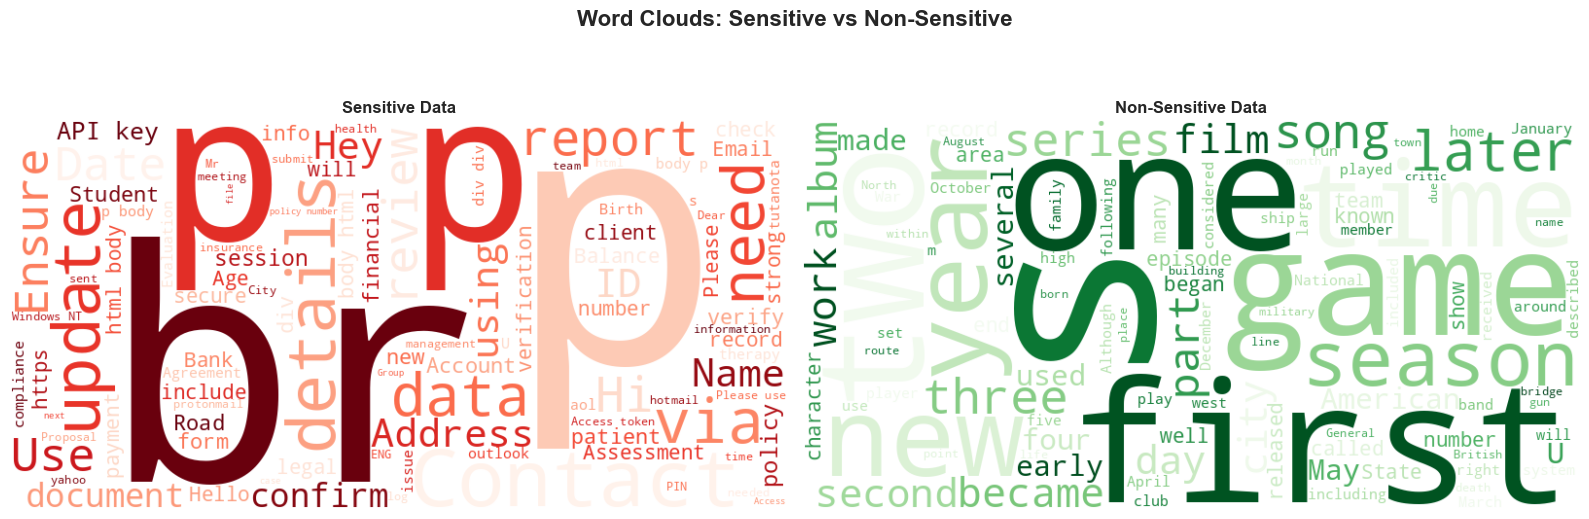

In [9]:
print("\n[6/8] Generating word clouds...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Word Clouds: Sensitive vs Non-Sensitive', fontsize=16, fontweight='bold')

# Sensitive word cloud
sensitive_text = ' '.join(train_df[train_df['label']==1]['text'].head(1000))
wordcloud_sensitive = WordCloud(width=800, height=400, 
                                background_color='white',
                                colormap='Reds',
                                max_words=100).generate(sensitive_text)
axes[0].imshow(wordcloud_sensitive, interpolation='bilinear')
axes[0].set_title('Sensitive Data', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Non-sensitive word cloud
non_sensitive_text = ' '.join(train_df[train_df['label']==0]['text'].head(1000))
wordcloud_non_sensitive = WordCloud(width=800, height=400,
                                    background_color='white',
                                    colormap='Greens',
                                    max_words=100).generate(non_sensitive_text)
axes[1].imshow(wordcloud_non_sensitive, interpolation='bilinear')
axes[1].set_title('Non-Sensitive Data', fontsize=12, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()

In [10]:
train_df.head(5)

,text,label,category,text_length,word_count
0,Can you send updates on services in 67561? Con...,1,pii,104,20
1,Just saw Bedford High’s new admissions form. T...,1,pii,103,13
2,"During the earlier seasons of the show , Magg...",0,non_sensitive,308,63
3,"After departing Fremantle , the convoy steame...",0,non_sensitive,500,90
4,Wonderful explanation on self-concept. Residen...,1,pii,130,18


In [11]:
!pip install pandas torch transformers scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install "accelerate>=0.26.0"



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re

# -----------------------------
# Load multi-type sensitive dataset
# -----------------------------
df = train_df.head(100)
print("Dataset shape:", df.shape)
print(df.head(5))

# -----------------------------
# Prepare train/test splits
# -----------------------------
texts = df['text'].tolist()
labels = df['label'].tolist()  # 1=sensitive, 0=non-sensitive

train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# -----------------------------
# Tokenizer
# -----------------------------
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# -----------------------------
# Dataset class
# -----------------------------
class KeyDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = KeyDataset(train_encodings, train_labels)
test_dataset = KeyDataset(test_encodings, test_labels)

# -----------------------------
# DistilBERT model
# -----------------------------
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

# -----------------------------
# Training arguments (older-compatible)
# -----------------------------
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=20,
    save_total_limit=1,
    do_train=True,
    do_eval=True
)

# -----------------------------
# Trainer
# -----------------------------
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# -----------------------------
# Train
# -----------------------------
trainer.train()

# -----------------------------
# Evaluate
# -----------------------------
preds = trainer.predict(test_dataset)
y_pred = preds.predictions.argmax(-1)
print(classification_report(test_labels, y_pred))

# -----------------------------
# Regex patterns for extraction
# -----------------------------
regex_dict = {
    "aws_access": r'\bAKIA[0-9A-Z]{16}\b',
    "aws_secret": r'\b[A-Za-z0-9/+=]{40}\b',
    "email": r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
    "ssn": r'\b\d{3}-\d{2}-\d{4}\b',
    "credit_card": r'\b(?:\d[ -]*?){13,16}\b',
    "phone": r'\+?\d[\d\s-]{7,}\d',
    "url_token": r'https?://[^\s]+'
}

def extract_sensitive(text):
    extracted = {}
    for key, pattern in regex_dict.items():
        match = re.search(pattern, text)
        extracted[key] = match.group() if match else None
    return extracted

# -----------------------------
# Test: Predict + Extract
# -----------------------------
def predict_and_extract(texts):
    if isinstance(texts, str):
        texts = [texts]
    enc = tokenizer(texts, truncation=True, padding=True, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**enc)
        preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
    results = []
    for text, pred in zip(texts, preds):
        res = {"text": text, "contains_sensitive": bool(pred)}
        res.update(extract_sensitive(text) if pred==1 else {k: None for k in regex_dict.keys()})
        results.append(res)
    return results

# -----------------------------
# Example Test Sentences
# -----------------------------
# test_sentences = [
#     "My AWS Access Key ID is AKIAJ4D7H8G9F2H2L7P1",
#     "The document is saved on my local machine",
#     "Email: john.doe@example.com",
#     "Employee SSN: 123-45-6789",
#     "Credit card number: 4111 1111 1111 1111",
#     "Use this API: https://api.example.com?key=abc123",
#     "Call me at +1-202-555-0134"
# ]

# results = predict_and_extract(test_sentences)
# for r in results:
#     print(r)

test_sentences = test_df['text'].head(20).tolist()

# Run predictions and extraction
results = predict_and_extract(test_sentences)

# Print results
for r in results:
    print(r)

Dataset shape: (100, 5)
                                                text  label       category  \
0  Can you send updates on services in 67561? Con...      1            pii   
1  Just saw Bedford High’s new admissions form. T...      1            pii   
2   During the earlier seasons of the show , Magg...      0  non_sensitive   
3   After departing Fremantle , the convoy steame...      0  non_sensitive   
4  Wonderful explanation on self-concept. Residen...      1            pii   

   text_length  word_count  
0          104          20  
1          103          13  
2          308          63  
3          500          90  
4          130          18  


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
o:\REDACTION_SYSTEM\prototyping\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


o:\REDACTION_SYSTEM\prototyping\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

{'text': 'JWT Token: sj2gvqAlGBExVnz6.0IoOz55xHzhoxeBF.Hnsit1bFJXlJvHGW', 'contains_sensitive': True, 'aws_access': None, 'aws_secret': None, 'email': None, 'ssn': None, 'credit_card': None, 'phone': None, 'url_token': None}
{'text': " On 2 July 1942 Driberg cast his first vote in the House of Commons , in support of Churchill against a rebel motion of censure on the government 's conduct of the war . The rebels ' case was put incompetently , which ensured that the motion gained only 25 votes , as against 477 cast for the government . Driberg delivered his maiden speech on 7 July , in a debate on the use of propaganda . He called for the lifting of the ban on the C

In [14]:
# # Display the first 20 rows of your test DataFrame
# print(test_df.head(20))

# # Convert the 'text' column to a list of sentences
# test_sentences = test_df['text'].tolist()

# # Get predictions and extracted entities (assuming your function returns a list of dicts or similar)
# results = predict_and_extract(test_sentences)

# # Print each result
# for i, r in enumerate(results, start=1):
#     print(f"Result {i}: {r}")

In [15]:
# !pip install transformers[torch]

In [16]:
import pandas as pd

# 'results' is your list of dictionaries
result_test = pd.DataFrame({
    "text": [r["text"] for r in results],
    "prediction": [1 if r["contains_sensitive"] else 0 for r in results]
})

print(result_test)


                                                 text  prediction
0   JWT Token: sj2gvqAlGBExVnz6.0IoOz55xHzhoxeBF.H...           1
1    On 2 July 1942 Driberg cast his first vote in...           0
2   Patient Yasarcan, ZIP code 19382, document REF...           1
3   Report Doc ID: REF-201604-5109\nTime of Incide...           1
4   AWS Access Key ID: DO4kEcHTarhMQxxeqEoBxaRuBtX...           1
5    As one of six games available at the Sega Sat...           0
6              const apiKey = 'AKIAG10MPGQMTIQJMDX4';           1
7    Doping has played a significant part in the m...           0
8   Contamination concerns at SE. mining area desc...           1
9    Kesha 's second studio album Warrior used con...           0
10   Oldham Roughyeds Rugby League Club was establ...           0
11   Torres was sent off for receiving two yellow ...           0
12  Hi Amoretti, important update: Scottish Buildi...           1
13  caraqtbodcrfo05, I'm checking the compliance w...           1
14   Gilbe

In [17]:
from sklearn.metrics import accuracy_score

# Take first 20 rows
test_subset = test_df.head(2000)

# Get texts and true labels
test_texts = test_subset['text'].tolist()
true_labels = test_subset['label'].tolist()  # 1=sensitive, 0=non-sensitive

# Run predictions
results = predict_and_extract(test_texts)

# Convert to numeric predictions
pred_labels = [1 if r["contains_sensitive"] else 0 for r in results]

# Calculate accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print("Accuracy on first 2000 test samples:", accuracy)

# Optional: create result_test DataFrame
result_test = pd.DataFrame({
    "text": test_texts,
    "true_label": true_labels,
    "prediction": pred_labels
})

print(result_test)


Accuracy on first 2000 test samples: 0.9935
                                                   text  true_label  \
0     JWT Token: sj2gvqAlGBExVnz6.0IoOz55xHzhoxeBF.H...           1   
1      On 2 July 1942 Driberg cast his first vote in...           0   
2     Patient Yasarcan, ZIP code 19382, document REF...           1   
3     Report Doc ID: REF-201604-5109\nTime of Incide...           1   
4     AWS Access Key ID: DO4kEcHTarhMQxxeqEoBxaRuBtX...           1   
...                                                 ...         ...   
1995   The vowel system of Biblical Hebrew has chang...           0   
1996   The diet of the adult Guianan cock @-@ of @-@...           0   
1997  For the research proposal, confirm 492-469-237...           1   
1998   The pumpkin bombs were externally similar to ...           0   
1999   The College of Business is a professional sch...           0   

      prediction  
0              1  
1              0  
2              1  
3              1  
4       

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print("Accuracy:", accuracy)

# Precision, Recall, F1-score
precision = precision_score(true_labels, pred_labels)
recall = recall_score(true_labels, pred_labels)
f1 = f1_score(true_labels, pred_labels)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:\n", cm)

# Detailed classification report
print("\nClassification Report:\n", classification_report(true_labels, pred_labels, digits=3))


Accuracy: 0.9935
Precision: 0.988
Recall:    0.999
F1-score:  0.994
Confusion Matrix:
 [[ 977   12]
 [   1 1010]]

Classification Report:
               precision    recall  f1-score   support

           0      0.999     0.988     0.993       989
           1      0.988     0.999     0.994      1011

    accuracy                          0.994      2000
   macro avg      0.994     0.993     0.993      2000
weighted avg      0.994     0.994     0.993      2000

